In [1]:
!curl -L -o /content/diabetes-data-set.zip  https://www.kaggle.com/api/v1/datasets/download/mathchi/diabetes-data-set && unzip /content/diabetes-data-set.zip && rm /content/diabetes-data-set.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9128  100  9128    0     0  18915      0 --:--:-- --:--:-- --:--:--     0
Archive:  /content/diabetes-data-set.zip
  inflating: diabetes.csv            


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [3]:
column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
df = pd.read_csv('/content/diabetes.csv', header=None, names=column_names)
df = df.drop(0)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   outcome   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [5]:
df.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
outcome,0


In [6]:

feature_columns = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
df['pregnant'] = pd.to_numeric(df['pregnant'])
df['insulin'] = pd.to_numeric(df['insulin'])
df['bmi'] = pd.to_numeric(df['bmi'])
df['age'] = pd.to_numeric(df['age'])
df['glucose'] = pd.to_numeric(df['glucose'])
df['bp'] = pd.to_numeric(df['bp'])
df['pedigree'] = pd.to_numeric(df['pedigree'])
x = df[feature_columns]
y = df.outcome

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [8]:
model = LogisticRegression(max_iter=1000,solver="lbfgs")
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(x_test)

In [10]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100), '%' )

Confusion Matrix : [[88 12]
 [19 35]]
Accuracy Score : 0.7987012987012987
Accuracy in Percentage: 79 %


<Axes: xlabel='Predicted', ylabel='Actual'>

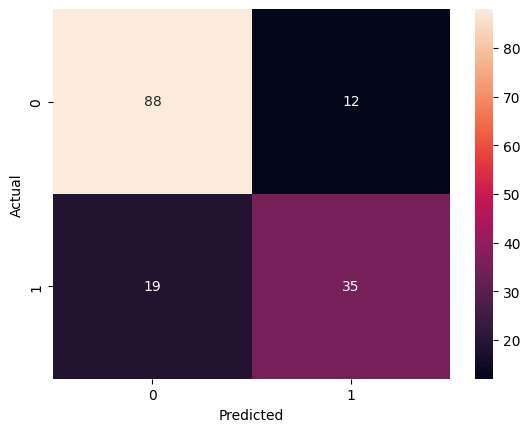

In [11]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)